In [1]:
import datetime
import random

import numpy as np
import yaml
from matplotlib import pyplot as plt
from tqdm import tqdm
import os
import csv

from utils.data_reading.features_extractor import STFTFeaturesExtractor, RelativeDWTFeaturesExtractor, WaveformDataFeaturesExtractor
from utils.data_reading.sound_file_manager import WavFilesManager
from utils.misc.misc import make_directory

In [27]:
datasets_yaml_path = "/media/plerolland/LaBoite/PublicData/dataset.yaml"
events_yaml_path = "../../figures/events.yaml"
chosen_event = "cryophony_1"

with open(events_yaml_path, "r") as f:
    event = yaml.load(f, Loader=yaml.BaseLoader)[chosen_event]

segment_duration = datetime.timedelta(seconds=int(event["segment_duration_s"])) # duration of the segment around the event
segment_center = datetime.datetime.strptime(event["segment_center"], "%Y%m%d_%H%M%S") # event to show

with open(datasets_yaml_path, "r") as f:
    params = yaml.load(f, Loader=yaml.BaseLoader)[event["dataset"]]
manager = WavFilesManager(f'{params["root_dir"]}/{event["station"]}')
# type of data that we want
features_extractor = STFTFeaturesExtractor(manager, vmin=-35, vmax=140, axis_labels=False)  # spectrograms generator

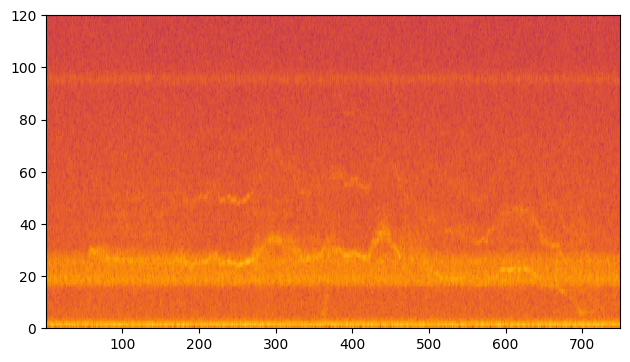

In [28]:
output_path = f'../../figures/{chosen_event}_{event["station"]}_{event["segment_center"]}.png'

features_extractor.show_features(segment_center - segment_duration / 2, segment_center + segment_duration / 2)

plt.savefig(output_path, bbox_inches='tight')